# Machine Learning for Climate Science Tutorial with Python

## Part 3: Handling real world datasets with `pandas`

In this last part of the tutorial, we are going to look at how to work with real world data and in particular, get a taste of how to use `pandas`, which is a popular `python` library used for preparing and handling datasets. The dataset that we are going to use here is a snippet of the meteoblue dataset for the weather in Basel, Switzerland during the period 2014-2019, which is pre-downloaded (source: [meteoblue.com](https://www.meteoblue.com/en/weather/archive/export/basel_switzerland_2661604)) and can be found in the `datasets` folder.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
currentdir = os.path.dirname(os.path.realpath('__file__'))
parentdir = os.path.dirname(currentdir)

The meteoblue data in the `datasets` folder is a `.csv` (comma-separated values) file and can be loaded as a `pandas` DataFrame object using `pd.read_csv`. If you're familiar with excel, a DataFrame is just like a spreadsheet, where data is stored in tabular form.

In [2]:
filename = parentdir+'/datasets/meteoblue_toy_dataset.csv'
df = pd.read_csv(filename)

To look at the first few rows of the data that we just loaded, we call `df.head()` (if you want to look at the last few rows, call `df.tail()` instead). By default, this will print the first five rows of the data frame, but we're instead going to print the first fifteen rows by passing the argument `n=15`.

In [3]:
df.head(n=15)

,location,Basel,Basel.1,Basel.2,Basel.3,Basel.4
0,lat,47.54694,47.54694,47.54694,47.54694,47.54694
1,lon,7.56892,7.56892,7.56892,7.56892,7.56892
2,asl,283.697,283.697,283.697,283.697,283.697
3,variable,Temperature,Relative Humidity,Wind Speed,Wind Direction,Mean Sea Level Pressure
4,unit,°C,%,km/h,°,hPa
5,level,2 m elevation corrected,2 m,10 m,10 m,MSL
6,resolution,hourly,hourly,hourly,hourly,hourly
7,aggregation,None,None,None,None,None
8,timestamp,Basel Temperature [2 m elevation corrected],Basel Relative Humidity [2 m],Basel Wind Speed [10 m],Basel Wind Direction [10 m],Basel Mean Sea Level Pressure [MSL]
9,20140101T0000,1.6905286,45.0,6.9527545,111.2505,1017.8


The dataset looks a little messy and needs some work done.
Let's see what's happening here.

First, it appears that the first eight rows (0~7) contain information about the dataset itself (this is called *metadata*) such as the location and units of the measured variables, which we may wish to keep, but is not going to be passed into our machine learning algorithms. The metadata and the actual data are clumped together in the above dataset, which we should separate.

Secondly, the column header (the names given to each columns) doesn't seem right - the header assigned above is likely just part of the metadata, but `read_csv` recognised it as the column header as it automatically assigns the first row of the `.csv` file as the header.

### Cleaning up the data

Let's start by fixing the second problem. The column headers in a data frame can be accessed via the `columns` attribute.

In [4]:
print(f"column header: {df.columns.values}")

column header: ['location' 'Basel' 'Basel.1' 'Basel.2' 'Basel.3' 'Basel.4']


Instead of `['location', 'Basel', 'Basel.1', 'Basel.2', 'Basel.3', 'Basel.4']`, we replace the header by `[0, 1, 2, 3, 4, 5]`.

In [5]:
header = [0, 1, 2, 3, 4, 5]
df.columns = header
df.head()

,0,1,2,3,4,5
0,lat,47.54694,47.54694,47.54694,47.54694,47.54694
1,lon,7.56892,7.56892,7.56892,7.56892,7.56892
2,asl,283.697,283.697,283.697,283.697,283.697
3,variable,Temperature,Relative Humidity,Wind Speed,Wind Direction,Mean Sea Level Pressure
4,unit,°C,%,km/h,°,hPa


However, the information `['location', 'Basel', 'Basel.1', 'Basel.2', 'Basel.3', 'Basel.4']` is now lost from the metadata since we *replaced* it with `[0, 1, 2, 3, 4, 5]`. If we wanted to keep this information (not that it is useful, but for the sake of illustration), one solution would be to reload the data using `read_csv` but this time, passing the argument `header=None`.

In [6]:
df = pd.read_csv(filename, header=None)
df.head()

,0,1,2,3,4,5
0,location,Basel,Basel,Basel,Basel,Basel
1,lat,47.54694,47.54694,47.54694,47.54694,47.54694
2,lon,7.56892,7.56892,7.56892,7.56892,7.56892
3,asl,283.697,283.697,283.697,283.697,283.697
4,variable,Temperature,Relative Humidity,Wind Speed,Wind Direction,Mean Sea Level Pressure


We also notice that the first column of the data actually gives us the attributes of the data, so we may want to use this as the row index, instead of the meaningless labels `[0, 1, 2, ...]`. This can be done using the `set_index` method as we show below (in `pandas`, the rows are called `index`).

In [7]:
df.set_index(0, inplace=True)
df.head(15)

,1,2,3,4,5
0,,,,,
location,Basel,Basel,Basel,Basel,Basel
lat,47.54694,47.54694,47.54694,47.54694,47.54694
lon,7.56892,7.56892,7.56892,7.56892,7.56892
asl,283.697,283.697,283.697,283.697,283.697
variable,Temperature,Relative Humidity,Wind Speed,Wind Direction,Mean Sea Level Pressure
unit,°C,%,km/h,°,hPa
level,2 m elevation corrected,2 m,10 m,10 m,MSL
resolution,hourly,hourly,hourly,hourly,hourly
aggregation,None,None,None,None,None


Note that we passed the argument `inplace=True`, which modifies the existing data frame, instead of creating a new one.
Now our dataset is in better shape so let's proceed to split the dataset into a metadata part and the actual data that we will use!

Below, we create a new DataFrame object called `metadata` that consists of just the first nine rows (from `location` to `aggregation`) of the above data. This can be done by slicing the rows by its labels using the `loc` method.

In [8]:
metadata = df.loc['location':'aggregation']
metadata.head(10)

,1,2,3,4,5
0,,,,,
location,Basel,Basel,Basel,Basel,Basel
lat,47.54694,47.54694,47.54694,47.54694,47.54694
lon,7.56892,7.56892,7.56892,7.56892,7.56892
asl,283.697,283.697,283.697,283.697,283.697
variable,Temperature,Relative Humidity,Wind Speed,Wind Direction,Mean Sea Level Pressure
unit,°C,%,km/h,°,hPa
level,2 m elevation corrected,2 m,10 m,10 m,MSL
resolution,hourly,hourly,hourly,hourly,hourly
aggregation,None,None,None,None,None


Alternatively, we can slice the rows by the index positions using the `iloc` method if you prefer that (note: the result is the same).

In [9]:
metadata = df.iloc[:9]
metadata.head(10)

,1,2,3,4,5
0,,,,,
location,Basel,Basel,Basel,Basel,Basel
lat,47.54694,47.54694,47.54694,47.54694,47.54694
lon,7.56892,7.56892,7.56892,7.56892,7.56892
asl,283.697,283.697,283.697,283.697,283.697
variable,Temperature,Relative Humidity,Wind Speed,Wind Direction,Mean Sea Level Pressure
unit,°C,%,km/h,°,hPa
level,2 m elevation corrected,2 m,10 m,10 m,MSL
resolution,hourly,hourly,hourly,hourly,hourly
aggregation,None,None,None,None,None


Next, we create a DataFrame object called `meteo_data` that contains the rest of the data (row nine and onwards) with `iloc`.

In [10]:
meteo_data = df.iloc[9:]
meteo_data.head()

,1,2,3,4,5
0,,,,,
timestamp,Basel Temperature [2 m elevation corrected],Basel Relative Humidity [2 m],Basel Wind Speed [10 m],Basel Wind Direction [10 m],Basel Mean Sea Level Pressure [MSL]
20140101T0000,1.6905286,45.0,6.9527545,111.2505,1017.8
20140101T0100,2.0805285,41.0,7.42159,104.03624,1018.1
20140101T0200,2.1305285,39.0,7.24486,116.56505,1018.0
20140101T0300,3.3205285,42.0,5.6002855,135.0,1017.2


Notice that the first row is actually the header of this data frame so we are going to replace it as the new column header.

In [11]:
new_header = meteo_data.iloc[0]
meteo_data = meteo_data.iloc[1:]
meteo_data.columns = new_header
meteo_data.head()

timestamp,Basel Temperature [2 m elevation corrected],Basel Relative Humidity [2 m],Basel Wind Speed [10 m],Basel Wind Direction [10 m],Basel Mean Sea Level Pressure [MSL]
0,,,,,
20140101T0000,1.6905286,45.0,6.9527545,111.2505,1017.8
20140101T0100,2.0805285,41.0,7.42159,104.03624,1018.1
20140101T0200,2.1305285,39.0,7.24486,116.56505,1018.0
20140101T0300,3.3205285,42.0,5.6002855,135.0,1017.2
20140101T0400,5.1905284,56.0,4.68,180.0,1016.3


The way that the timestamps in the index are displayed at the moment are a little hard to read and this can be improved by converting it into a `DatetimeIndex` format using `pd.to_datetime`.

In [13]:
datetime_before = meteo_data.index
datetime_after = pd.to_datetime(datetime_before.values)

print(f"format before: {datetime_before.values[0]}")
print(f"format after: {datetime_after.values[0]}")

meteo_data.index = datetime_after
meteo_data.head()

format before: 20140101T0000
format after: 2014-01-01T00:00:00.000000000


timestamp,Basel Temperature [2 m elevation corrected],Basel Relative Humidity [2 m],Basel Wind Speed [10 m],Basel Wind Direction [10 m],Basel Mean Sea Level Pressure [MSL]
2014-01-01 00:00:00,1.6905286,45.0,6.9527545,111.2505,1017.8
2014-01-01 01:00:00,2.0805285,41.0,7.42159,104.03624,1018.1
2014-01-01 02:00:00,2.1305285,39.0,7.24486,116.56505,1018.0
2014-01-01 03:00:00,3.3205285,42.0,5.6002855,135.0,1017.2
2014-01-01 04:00:00,5.1905284,56.0,4.68,180.0,1016.3


We're also going to rename the columns to `[Temperature, Humidity, Wind speed, Wind direction, Pressure]` for simplicity.

In [14]:
new_header = ['Temperature', 'Humidity', 'Wind speed', 'Wind direction', 'Pressure']
meteo_data.columns = new_header
meteo_data.head()

,Temperature,Humidity,Wind speed,Wind direction,Pressure
2014-01-01 00:00:00,1.6905286,45.0,6.9527545,111.2505,1017.8
2014-01-01 01:00:00,2.0805285,41.0,7.42159,104.03624,1018.1
2014-01-01 02:00:00,2.1305285,39.0,7.24486,116.56505,1018.0
2014-01-01 03:00:00,3.3205285,42.0,5.6002855,135.0,1017.2
2014-01-01 04:00:00,5.1905284,56.0,4.68,180.0,1016.3


Perfect! Now we are ready to start digging into the data more deeply.

### Exploratory data analysis

In data science lingo, 'exploratory data analysis', or EDA for short, refers to the practice of messing around with the data and trying to gain insights about it before applying any machine learning algorithms. It is the phase of 'getting to know' your data.

First, let's look at the shape of the data, i.e. how many features and samples are present? Like in `numpy`, this can be done by calling the `shape` method.

In [15]:
print(f"shape of data: {meteo_data.shape}")

shape of data: (52584, 5)


We can get an overall picture about the data using the `info` method. This tells you things like: What are the attributes of the data? How is it indexed? What are the data types? How many samples are there per attribute? How much memory does it consume in total?

In [16]:
meteo_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52584 entries, 2014-01-01 00:00:00 to 2019-12-31 23:00:00
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Temperature     52584 non-null  object
 1   Humidity        52584 non-null  object
 2   Wind speed      52584 non-null  object
 3   Wind direction  52584 non-null  object
 4   Pressure        52584 non-null  object
dtypes: object(5)
memory usage: 2.4+ MB


We notice that the data type for each attribute is `object` (i.e. `str`), which we did not notice before. We can convert this to `float` by applying `pd.to_numeric` to each column.

In [17]:
columns = meteo_data.columns
for column in columns:
    meteo_data[column] = pd.to_numeric(meteo_data[column])
    
meteo_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52584 entries, 2014-01-01 00:00:00 to 2019-12-31 23:00:00
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     52584 non-null  float64
 1   Humidity        52584 non-null  float64
 2   Wind speed      52584 non-null  float64
 3   Wind direction  52584 non-null  float64
 4   Pressure        52584 non-null  float64
dtypes: float64(5)
memory usage: 2.4 MB


We can also find out the basic statistics of the data, like the mean and standard deviation using the `describe` method.

In [18]:
meteo_data.describe()

,Temperature,Humidity,Wind speed,Wind direction,Pressure
count,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000
mean,12.699125,69.124277,11.131454,200.439479,1017.200346
std,7.699477,15.182872,8.238189,93.948340,8.522304
min,-9.249471,17.000000,0.000000,0.795715,976.100000
25%,6.678029,58.000000,5.400000,116.565050,1012.500000
50%,12.260529,71.000000,8.913181,214.695160,1017.100000
75%,18.280529,81.000000,14.578888,276.078303,1022.100000
max,36.700527,100.000000,79.989690,360.000000,1049.900000


Sometimes, the data might be missing and replaced by `NaN`, in which case we should either interpolate its value or remove it altogether. To check whether the data has any missing values, we call `.isnull().any()`.

In [19]:
meteo_data.isnull().any()

Temperature       False
Humidity          False
Wind speed        False
Wind direction    False
Pressure          False
dtype: bool

Luckily, we don't have to worry about any missing data. Next, let's plot our data to see whether it has any general trends, periodicity, etc... This can be done easily using the `plot` method.

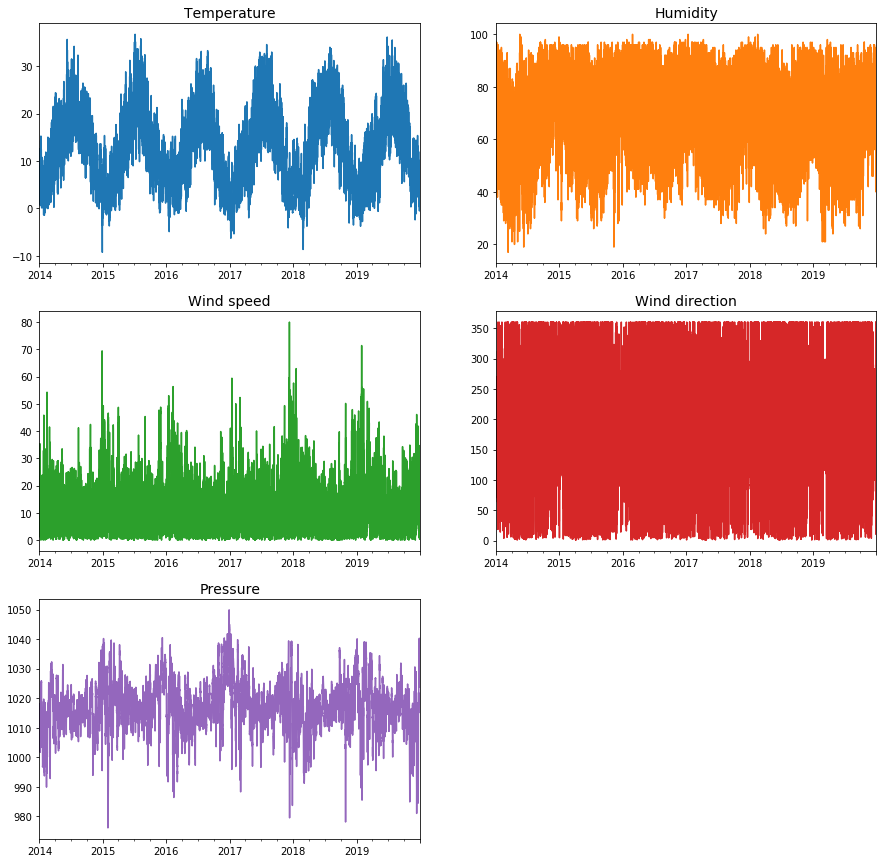

In [20]:
fig = plt.figure(figsize=(15, 15))
timestamps = meteo_data.index
features = meteo_data.columns
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]
for i, feature in enumerate(features):
    ax = plt.subplot(3, 2, i+1)
    temp_data = meteo_data[feature]
    temp_data.index = timestamps
    plt.title(feature, fontsize=14)
    temp_data.plot(color=colors[i])

plt.show()

Unsurprisingly, there is a clear periodic for the variables `Temperature`, `Wind speed` and `Pressure`. The patterns present in `Humidity` and `Wind direction` is less obvious.

Next, let's visualize the correlations between these variables using a heatmap.

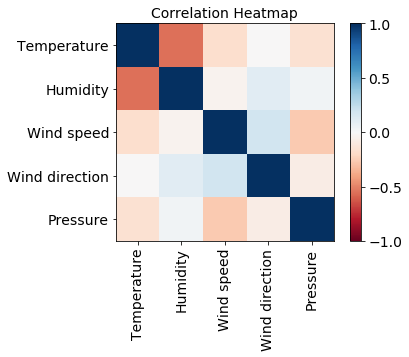

In [21]:
plt.imshow(meteo_data.corr(), cmap='RdBu', vmin = -1, vmax = 1)
n_features = range(meteo_data.shape[1])
plt.xticks(n_features, meteo_data.columns, fontsize=14, rotation=90)
plt.gca().xaxis.tick_bottom()
plt.yticks(n_features, meteo_data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

We see that the attribute `Temperature` is highly correlated with `Humidity`, moderately correlated with `Wind speed` and `Pressure`, and has almost no correlation with `Wind direction`. Based on this observation, we can ask whether it's possible to predict the `Temperature` using the other attributes so that's what we'll do next. Note that this is a *regression problem* (see Part 2 of the tutorial) since `Temperature` is a continuous variable.

### Prediction with a linear model

In [22]:
import sklearn
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

We are going to predict the `Temperature` using the variables `Humidity`, `Wind speed` and `Pressure`. The model we will use is linear of the form:

$$
y = \alpha_H X_H + \alpha_W X_W + \alpha_P X_P + \beta,
$$

where $y$ is the `Temperature` and $X_H, X_W, X_P$ are the `Humidity`, `Wind speed` and `Pressure` respectively.

In [23]:
y = meteo_data[['Temperature']]
X = meteo_data[['Humidity', 'Pressure', 'Wind speed']]

For the training data, we will use the hourly measurements for the period 2014-2018 and for the testing data, we will use the period 2018-2019.

In [24]:
train_X, test_X = X.loc['2014':'2018'], X.loc['2018':'2019']
train_y, test_y = y.loc['2014':'2018'], y.loc['2018':'2019']

Before we fit a linear model on this, let us also consider a simple baseline model to pit it against. The baseline we are going to use is the mean temperature of the training set, so whatever the input, it only outputs the mean temperature. Below, we compute the predictions based on this baseline and compute its $R^2$ score. This should be close to zero according to the definition of $R^2$.

In [25]:
mean = train_y.mean().values
ypred = mean * np.ones(test_y.shape)

R2_baseline = r2_score(test_y, ypred)
print(f"R2 score of baseline: {R2_baseline}")

R2 score of baseline: -0.0018909382434473265


Now we fit the data on the linear model and compute its $R^2$ score.

In [26]:
linear_model = LinearRegression()
linear_model.fit(train_X.values, train_y.values)

ypred = linear_model.predict(test_X)
R2_linear = r2_score(test_y, ypred)
print(f"R2 score of the linear model: {R2_linear}")

R2 score of the linear model: 0.36084920207468973


The result is larger, so it does a better job than the simple baseline! Let's see this by plotting the predictions for the period 2014-2019.

<function matplotlib.pyplot.show(*args, **kw)>

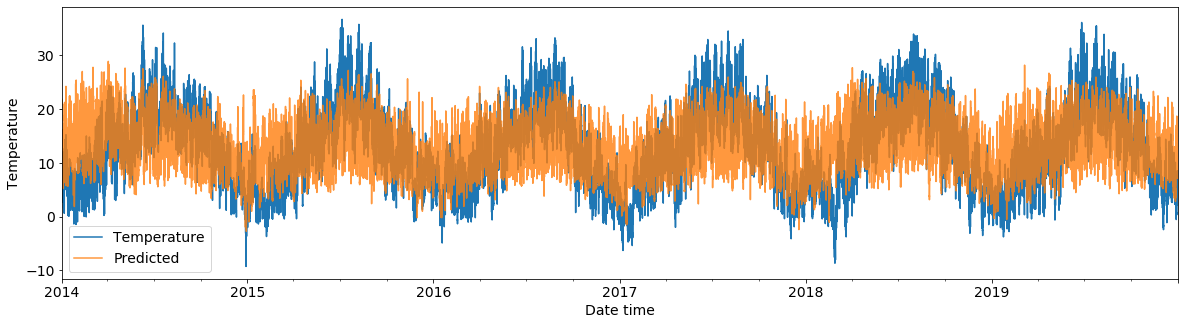

In [28]:
fig = plt.figure(figsize=(20, 5))
ax = plt.gca()

# Plot true temperature
y.plot(ax=ax)

# Get prediction
ypred = linear_model.predict(X)

# Change prediction from numpy array to pandas DataFrame
index = X.index
ypred = pd.DataFrame(ypred, index=index, columns=['Predicted'])

# Plot predicted temperature
ypred.plot(ax=ax, alpha=0.8)
ax.legend(fontsize=14)
ax.set_xlabel('Date time', fontsize=14)
ax.set_ylabel('Temperature', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.show

As we can see, the linear model successfully captures the periodicity that is present in the data, but it is still far from perfect.

__Now it's your turn!__ Can you predict the temperature using other methods such as decision trees and neural networks? You can also try predicting the daily or weekly temperatures instead of hourly, which might give you better peformance as there will be less noise in the data.